> #  For your cheating day, what should I eat?

* I will provide you with tips for choosing cheating food at McDonald's.
* I will analyze foods from McDonald's by category and examine the nutritional value of each item. 

* This way, you can identify which foods are lower or higher nutrition value compared to others.

**Data preperation**

In [1]:
# Import liabraries

import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns',30)
%matplotlib inline
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
menu = pd.read_csv('/kaggle/input/nutrition-facts/menu.csv')

In [3]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [4]:
menu.shape

(260, 24)

In [5]:
#check the null value
menu.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [6]:
print('nulls;',menu.isnull().sum().sum())

nulls; 0


In [7]:
#check the data type
print(menu.dtypes)

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


In [8]:
#check unique catefory of the menu
list(menu.Category.unique())

['Breakfast',
 'Beef & Pork',
 'Chicken & Fish',
 'Salads',
 'Snacks & Sides',
 'Desserts',
 'Beverages',
 'Coffee & Tea',
 'Smoothies & Shakes']

**Data cleaning**

In [9]:
#drop the clolumns
df= menu[['Category','Item','Serving Size','Calories','Calories from Fat','Total Fat','Total Fat (% Daily Value)',
         'Saturated Fat','Saturated Fat (% Daily Value)','Trans Fat','Cholesterol','Cholesterol (% Daily Value)',
        'Sodium','Sodium (% Daily Value)','Carbohydrates','Carbohydrates (% Daily Value)',
         'Dietary Fiber','Dietary Fiber (% Daily Value)','Sugars','Protein']].copy()
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21


In [10]:
#check the data type one last time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

**Labelling salt in the EU/UK**
* One gram of sodium equals approximately 2.5 g salt 
* To ensure that the final customer easily understands the labelling.
* 'salt means the salt equivalent content calculated using the formula: salt = sodium × 2,5'.
* [https://knowledge4policy.ec.europa.eu/health-promotion-knowledge-gateway/dietary-saltsodium_en#:~:text=Defining%20dietary%20salt%20and%20sodium,-Salt%20or%20sodium&text=One%20gram%20of%20salt%20contains,and%200.6%20g%20of%20chloride.](http://)

In [11]:
#calculation & rename sodium to salt
df['Serving Size g'] = df['Serving Size'].str.extract(r'\((\d+)\s*g\)').astype(float)


In [12]:
df['Salt'] = (df['Sodium']*2.5)/1000
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Serving Size g,Salt
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,136.0,1.875
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,135.0,1.925
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,111.0,1.950
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,161.0,2.150
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,161.0,2.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,285.0,0.700
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,381.0,0.950
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,190.0,0.475
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,403.0,1.000


In [13]:
#Rename cloumns
df.rename(columns={'Serving Size':'Serving_Size','Calories':'Calories_kcal','Calories from Fat':'Fat_g',
                   'Total Fat':'Total_Fat_g','Saturated Fat':'Saturated_Fat_g','Trans Fat':'Trans_Fat_g',
                   'Cholesterol':'Cholesterol_g','Carbohydrates':'Carbohydrates_g',
                    'Dietary Fiber':'Fiber_g','Sugars':'Sugars_g','Protein':'Protein_g'},inplace=True)
df

,Category,Item,Serving_Size,Calories_kcal,Fat_g,Total_Fat_g,Total Fat (% Daily Value),Saturated_Fat_g,Saturated Fat (% Daily Value),Trans_Fat_g,Cholesterol_g,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates_g,Carbohydrates (% Daily Value),Fiber_g,Dietary Fiber (% Daily Value),Sugars_g,Protein_g,Serving Size g,Salt
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,136.0,1.875
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,135.0,1.925
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,111.0,1.950
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,161.0,2.150
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,161.0,2.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,285.0,0.700
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,381.0,0.950
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,190.0,0.475
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,403.0,1.000


**Data analysis**

* Reference Daily Intake: Total fat 70g, Saaturates 20g, carbohydrate 260g, Sugar 90g, protein 50, salt 6g

The 40-piece Chicken McNuggets from McDonald's exceeds the recommended daily intake of salt.

In [14]:
df[(df["Category"] == "Chicken & Fish") & (df["Salt"] > 6)]

,Category,Item,Serving_Size,Calories_kcal,Fat_g,Total_Fat_g,Total Fat (% Daily Value),Saturated_Fat_g,Saturated Fat (% Daily Value),Trans_Fat_g,Cholesterol_g,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates_g,Carbohydrates (% Daily Value),Fiber_g,Dietary Fiber (% Daily Value),Sugars_g,Protein_g,Serving Size g,Salt
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,265,89,3600,150,118,39,6,24,1,87,646.0,9.0


In [15]:
#check uniqe row from Category 
list(df.Category.unique())

['Breakfast',
 'Beef & Pork',
 'Chicken & Fish',
 'Salads',
 'Snacks & Sides',
 'Desserts',
 'Beverages',
 'Coffee & Tea',
 'Smoothies & Shakes']

**Data analysis & Visualisation**

NUMBER OF MENU ITEMS PER CATEGORIES

Text(0, 0.5, 'Menu Categories')

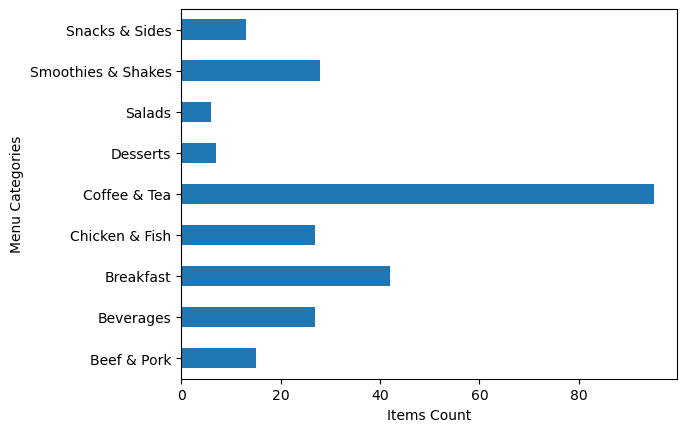

In [16]:
categories_count = menu['Category'].value_counts().sort_index().plot(kind='barh')
categories_count.set_xlabel("Items Count")
categories_count.set_ylabel("Menu Categories")

CALORIES PER CATEGORIES

<Axes: ylabel='Category'>

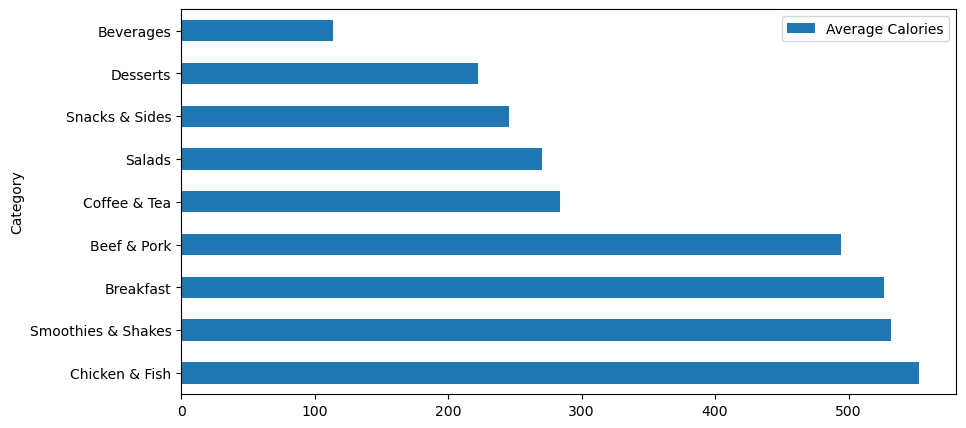

In [17]:
df[ ['Category', 'Calories_kcal'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Calories_kcal', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'Calories_kcal': 'Average Calories'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5))

AMOUNT OF SODIUM PER CATEGORIES

<Axes: ylabel='Category'>

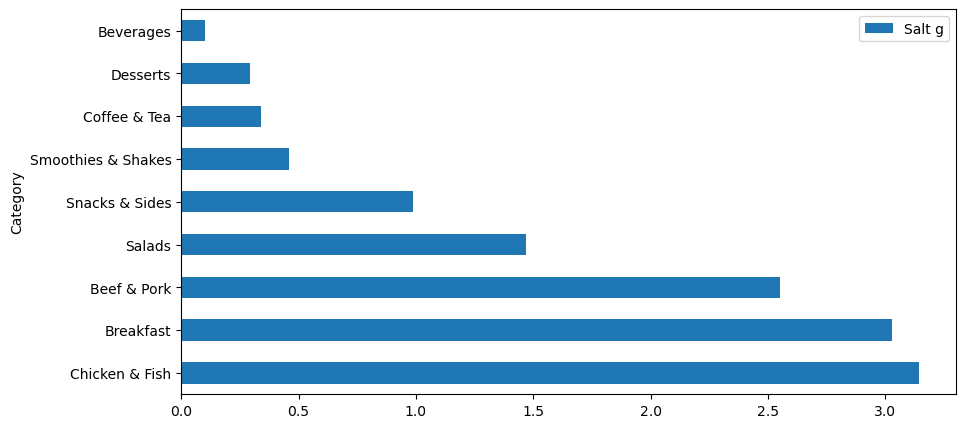

In [18]:
df[ ['Category', 'Salt'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Salt', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'Salt': 'Salt g'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5))

 PROTEIN vs CARBS

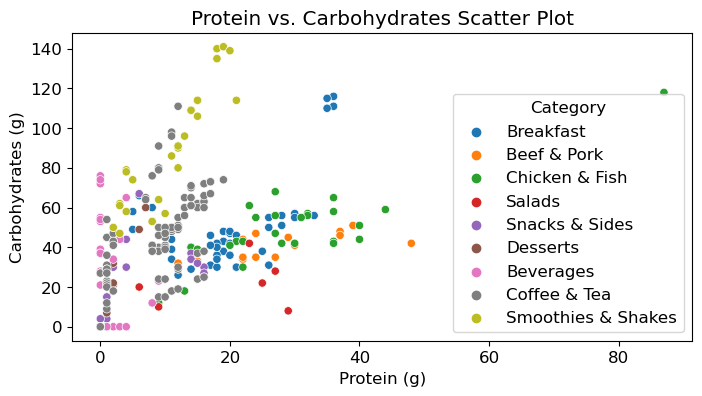

In [19]:
# create a scatter plot of protein vs. carbohydrates
plt.rc('font', family='sans-serif', size=12)
plt.subplots(figsize = (8,4), dpi = 100)
sns.scatterplot(x='Protein_g',hue = 'Category', y='Carbohydrates_g', data=df)

# set the title and x and y axis labels
plt.title('Protein vs. Carbohydrates Scatter Plot')
plt.xlabel('Protein (g)')
plt.ylabel('Carbohydrates (g)')


# show the plot
plt.show()

In [20]:
df.columns

Index(['Category', 'Item', 'Serving_Size', 'Calories_kcal', 'Fat_g',
       'Total_Fat_g', 'Total Fat (% Daily Value)', 'Saturated_Fat_g',
       'Saturated Fat (% Daily Value)', 'Trans_Fat_g', 'Cholesterol_g',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates_g', 'Carbohydrates (% Daily Value)', 'Fiber_g',
       'Dietary Fiber (% Daily Value)', 'Sugars_g', 'Protein_g',
       'Serving Size g', 'Salt'],
      dtype='object')

WHAT ARE THE TOP 5 FOOD ITEMS WITH THE HIGHEST PROTEN COTENT?

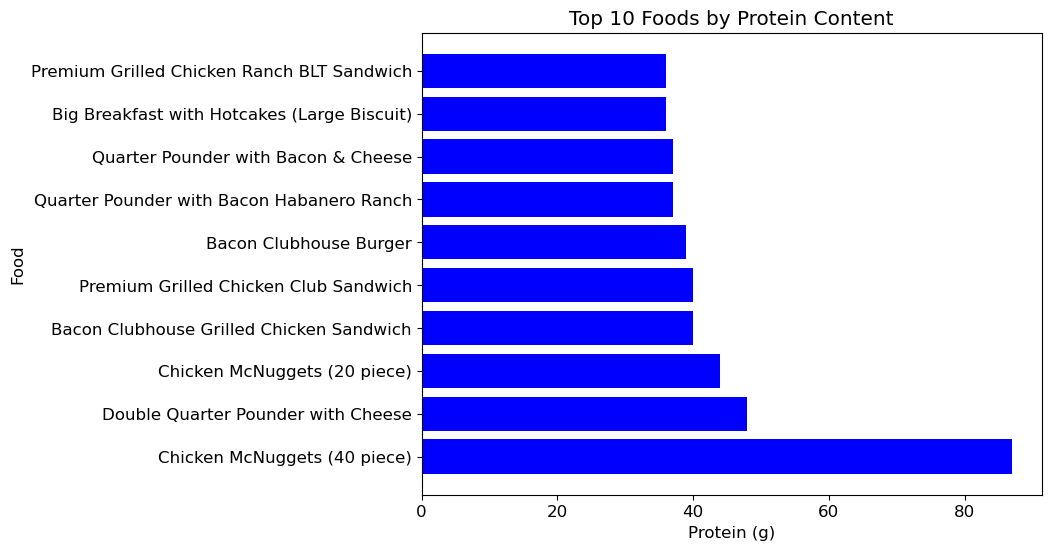

In [21]:
high_protein_df = df[df['Protein_g'] > 20]

top_10 = high_protein_df.sort_values('Protein_g',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_10['Item'], top_10['Protein_g'], color='blue')

# set the axis labels and title
plt.xlabel("Protein (g)")
plt.ylabel("Food")
plt.title("Top 10 Foods by Protein Content")

plt.show()


TOP 10 ITEMS BY FAT CONTAINS

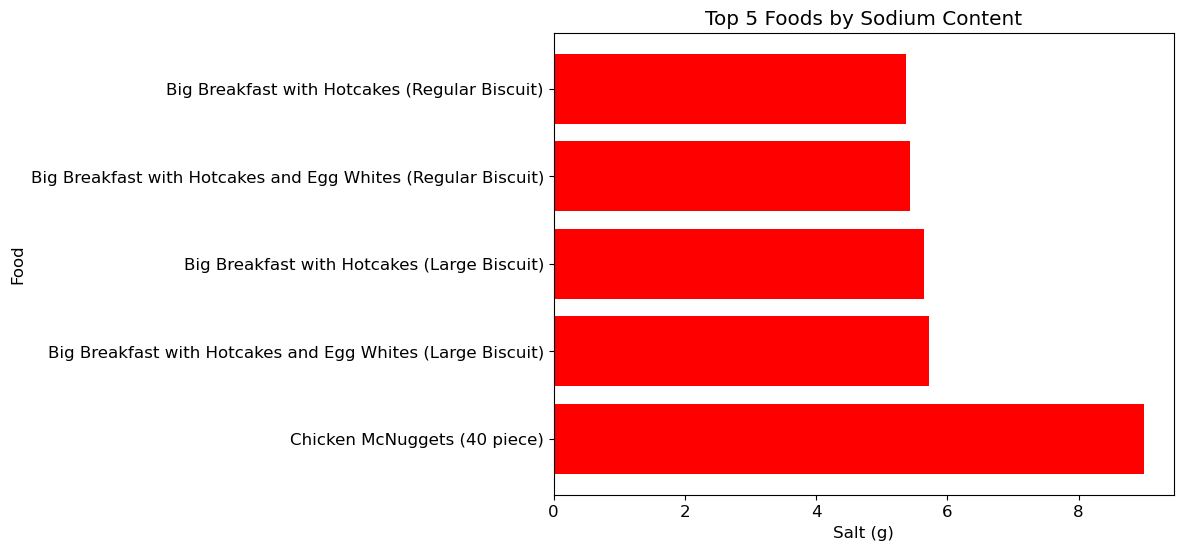

In [22]:
high_sodium_df = df[df['Salt'] > 1]

top_5 = high_sodium_df.sort_values('Salt',ascending=False).head(5)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_5['Item'], top_5['Salt'], color='red')

# set the axis labels and title
plt.xlabel("Salt (g)")
plt.ylabel("Food")
plt.title("Top 5 Foods by Sodium Content")

plt.show()

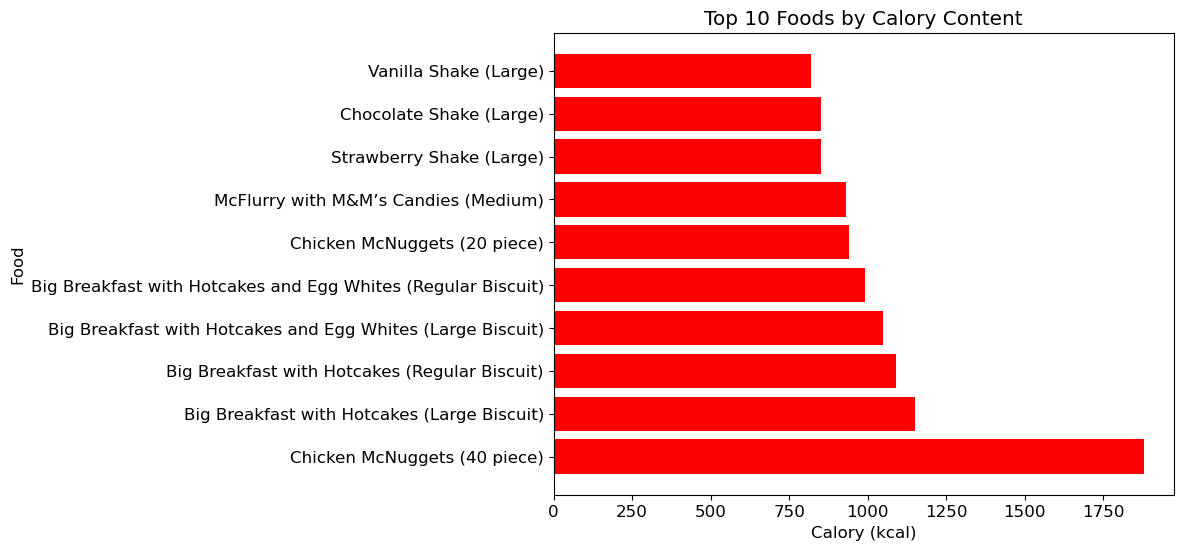

In [23]:
high_calroies_df = df[df['Calories_kcal'] > 20]

top_10 = high_calroies_df.sort_values('Calories_kcal',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_10['Item'], top_10['Calories_kcal'], color='red')

# set the axis labels and title
plt.xlabel("Calory (kcal)")
plt.ylabel("Food")
plt.title("Top 10 Foods by Calory Content")

plt.show()


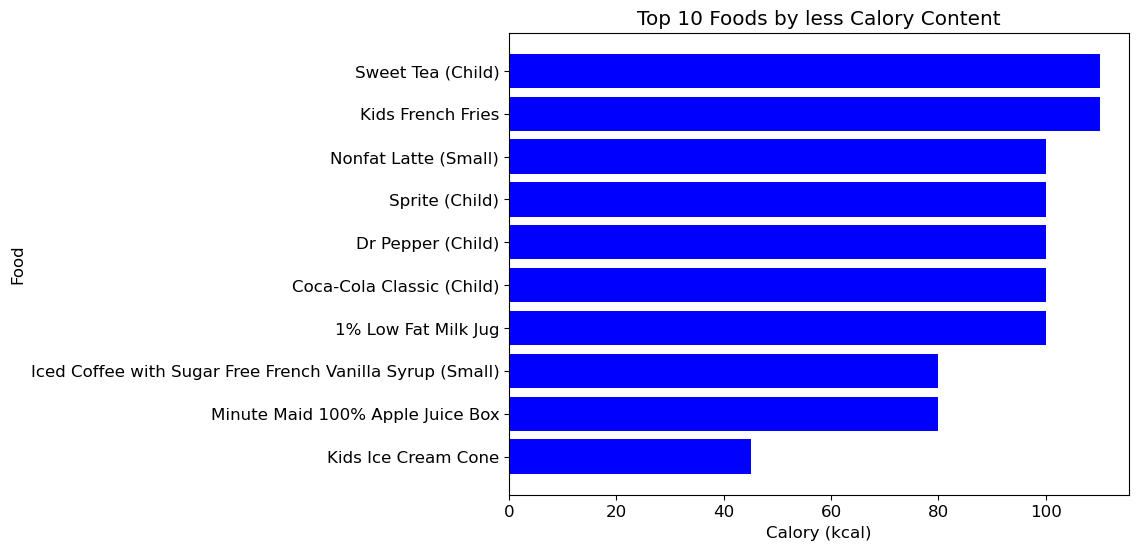

In [24]:
less_calroies_df = df[df['Calories_kcal'] > 20]

top_10 = less_calroies_df.sort_values('Calories_kcal',ascending=True).head(10)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_10['Item'], top_10['Calories_kcal'], color='blue')

# set the axis labels and title
plt.xlabel("Calory (kcal)")
plt.ylabel("Food")
plt.title("Top 10 Foods by less Calory Content")

plt.show()